Realizamos uma seleção de dois blocos econômicos a fim de utilizar seus países membros em uma análise comparativa do seu nível de utilização de fontes renováveis de energia, e classificando-os como avançados ou atrasados, tendo como base comparativa a mediana desses dados.

O primeiro bloco escolhido foi o Mercosul, o qual foi criado seguindo um processo de integração regional, sendo todos os seus integrantes, países sul-americanos. Ele surgiu com o objetivo de fornecer apoio e oportunidades econômicas, aumentando assim a integração e o desenvolvimento dos países membros. O Mercosul busca, portanto, fornece diversos benefícios aos seus integrantes, como a livre circulação de bens e mercadorias entre os países, uma mesma tarifa e política externa aplicada a todos os países, coordenação de políticas macroeconômicas e setoriais entre os Estados, assim como o dever de manter e garantir a harmonia entre todos os integrantes.

Ademais, o USMCA, antigo NAFTA, foi o segundo bloco econômico escolhido, e surgiu também a partir de um processo de integração regional, entre os 3 países da América do Norte (Estados Unidos, Canadá e México), o qual pretende incentivar uma zona de livre comércio na região desses países a fim de proporcionar um maior desenvolvimento econômico para os Estados. O bloco possui como principais características beneficentes aos seus integrantes: o fim das barreiras alfandegárias, intensificação das relações econômicas e a menor taxação sob os produtos importados e exportados entre os países membros etc.

Após a análise de seus dados, definimos os países como avançados ou atrasados com base em sua taxa de utilização de energia renovável em relação a energia total, para isso calculamos a média da taxa de cada país ao longo dos anos, em seguida definimos a mediana das taxas de todos os países como a barreira para definir o país como avançado ou não. Tendo a classificação pronta, criamos um preditor que define se um país pertence ao Mercosul ou ao USMCA sabendo a sua classificação. O preditor apresentou uma taxa de acertos de 65%, sendo um resultado razoável, mas que não permite definir esse indicador como um bom preditor para esses blocos econômicos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('dados\consumption_total_renewable_electricity.csv', skiprows=4)
df.set_index('Country Name', inplace=True)


In [2]:
#dados_de_2019

paises_do_mercosul = ['Brazil', 'Argentina', 'Uruguay', 'Paraguay', 'Venezuela, RB']
paises_do_usmca = ['United States', 'Mexico', 'Canada']
lista_anos = list(range(1990,2020))


energias_mercosul = []
dict_mercosul = {}
for pais in paises_do_mercosul:
    lista_anos_energia = []
    for ano in lista_anos:  
        energia = df.loc[pais, str(ano)]
        if pais not in dict_mercosul:
            dict_mercosul[pais] = {str(ano): energia}
        else:
            dict_mercosul[pais][str(ano)] = energia
        lista_anos_energia.append(energia)
    energias_mercosul.append(sum(lista_anos_energia)/len(lista_anos_energia))

d = {'País': paises_do_mercosul, "Energia": energias_mercosul}
df_mercosul = pd.DataFrame(data = d)
display(df_mercosul)


energias_usmca = []
dict_usmca = {}
for pais in paises_do_usmca:
    lista_anos_energia = []
    for ano in lista_anos:
        energia = df.loc[pais, str(ano)]
        if pais not in dict_usmca:
            dict_usmca[pais] = {str(ano): energia}
        else:
            dict_usmca[pais][str(ano)] = energia
        lista_anos_energia.append(energia)
    energias_usmca.append(sum(lista_anos_energia)/len(lista_anos_energia))

e = {'País': paises_do_usmca, 'Energia': energias_usmca}
df_usmca = pd.DataFrame(data = e)
display(df_usmca)

dict_mercosul
display(dict_usmca)
frames = [df_mercosul,df_usmca]
df_juntos = pd.concat(frames)



,País,Energia
0,Brazil,45.600144
1,Argentina,9.775443
2,Uruguay,46.086883
3,Paraguay,67.109776
4,"Venezuela, RB",14.244690


,País,Energia
0,United States,6.544847
1,Mexico,10.949208
2,Canada,21.935914


{'United States': {'1990': 4.17546218583434,
  '1991': 4.50791959377071,
  '1992': 4.76308310810846,
  '1993': 4.28152840674077,
  '1994': 4.08864139839829,
  '1995': 4.72655433519206,
  '1996': 4.76393045060593,
  '1997': 4.51426029882715,
  '1998': 4.5342968895809,
  '1999': 5.70972659311957,
  '2000': 5.43,
  '2001': 4.68,
  '2002': 4.84,
  '2003': 5.33,
  '2004': 5.48,
  '2005': 5.84,
  '2006': 6.4,
  '2007': 6.3,
  '2008': 6.85,
  '2009': 7.35,
  '2010': 7.44,
  '2011': 8.36,
  '2012': 8.73,
  '2013': 9.08,
  '2014': 9.22,
  '2015': 9.03,
  '2016': 9.46,
  '2017': 9.92,
  '2018': 10.12,
  '2019': 10.42},
 'Mexico': {'1990': 14.4133016877432,
  '1991': 13.1955118498823,
  '1992': 13.4270915549992,
  '1993': 13.3039693414023,
  '1994': 11.8631029257549,
  '1995': 13.2618332258809,
  '1996': 13.0647238378458,
  '1997': 12.6997773864092,
  '1998': 12.2384533673184,
  '1999': 12.748461320411,
  '2000': 12.17,
  '2001': 11.34,
  '2002': 10.68,
  '2003': 10.17,
  '2004': 10.21,
  '2005':

In [3]:
df_paises_mercosul = df.loc[paises_do_mercosul]
df_paises_mercosul

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
Country Name,,,,,,,,,,,,,,,,,,,,,
Brazil,BRA,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,42.32,41.71,43.62,45.46,45.33,46.95,47.57,NaN,NaN,NaN
Argentina,ARG,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.91,9.79,9.40,9.38,10.37,10.52,10.74,NaN,NaN,NaN
Uruguay,URY,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,51.87,56.70,59.40,60.32,60.82,60.86,60.76,NaN,NaN,NaN
Paraguay,PRY,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,62.55,62.54,60.51,62.49,60.12,59.24,60.09,NaN,NaN,NaN
"Venezuela, RB",VEN,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.29,12.01,15.33,14.51,14.31,14.57,15.62,NaN,NaN,NaN


In [4]:
# DEFINIMOS 18.51 COMO A BARREIRA PARA DEFINIR SE O PAÍS É AVANÇADO OU NÃO,
#E CHEGAMOS NESSE VALOR ATRAVÉS DO CÁLCULO DA MÉDIA DE CADA PAÍS AO LONGO 
#DOS ANOS E EM SEGUIDA CALCULAMOS A MEDIANA ENTRE A MÉDIA DE TODOS OS PAÍSES
filtro_avancados = df_juntos['Energia'] > 18.51
filtro_atrasados = df_juntos['Energia'] <= 18.51
df_avancados_mercosul = df_juntos[filtro_avancados]
display(df_avancados_mercosul)
df_atrasados_mercosul = df_juntos[filtro_atrasados]
display(df_atrasados_mercosul)



,País,Energia
0,Brazil,45.600144
2,Uruguay,46.086883
3,Paraguay,67.109776
2,Canada,21.935914


,País,Energia
1,Argentina,9.775443
4,"Venezuela, RB",14.244690
0,United States,6.544847
1,Mexico,10.949208


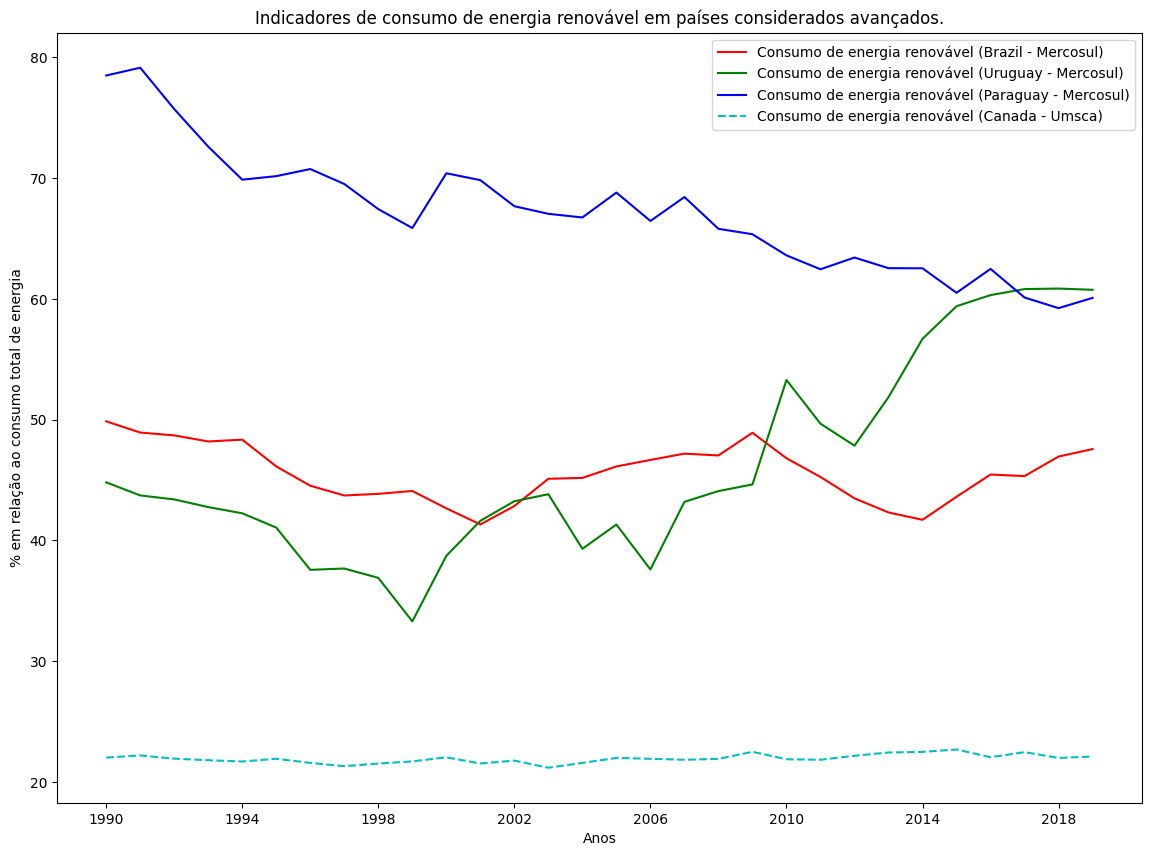

In [5]:
from matplotlib.pyplot import legend


paises_avancados_mercosul = ['Brazil','Uruguay','Paraguay']
paises_atrasados_mercosul = ['Argentina', 'Venezuela, RB']
paises_avancados_usmca = ['Canada']
paises_atrasados_usmca = ['United States','Mexico']
lista_de_cores = ['r','g','b','c']
plt.figure(figsize=(14,10))
plt.title("Indicadores de consumo de energia renovável em países considerados avançados.")
id_cor = 0
for pais in paises_avancados_mercosul:
    dados = dict_mercosul[pais]
    data = list(dados.keys())
    valor = list(dados.values())
    plt.plot(data, valor, color=lista_de_cores[id_cor], label=f'Consumo de energia renovável ({str(pais)} - Mercosul)')
    id_cor += 1
for pais in paises_avancados_usmca:
    dados = dict_usmca[pais]
    data = list(dados.keys())
    valor = list(dados.values())
    plt.plot(data, valor, color=lista_de_cores[id_cor],linestyle = 'dashed', label=f'Consumo de energia renovável ({str(pais)} - Umsca)')
    id_cor += 1
plt.xticks(list(str(i) for i in range(1990,2020,4)))
plt.ylabel('% em relação ao consumo total de energia')
plt.xlabel('Anos')
plt.legend()
plt.show()




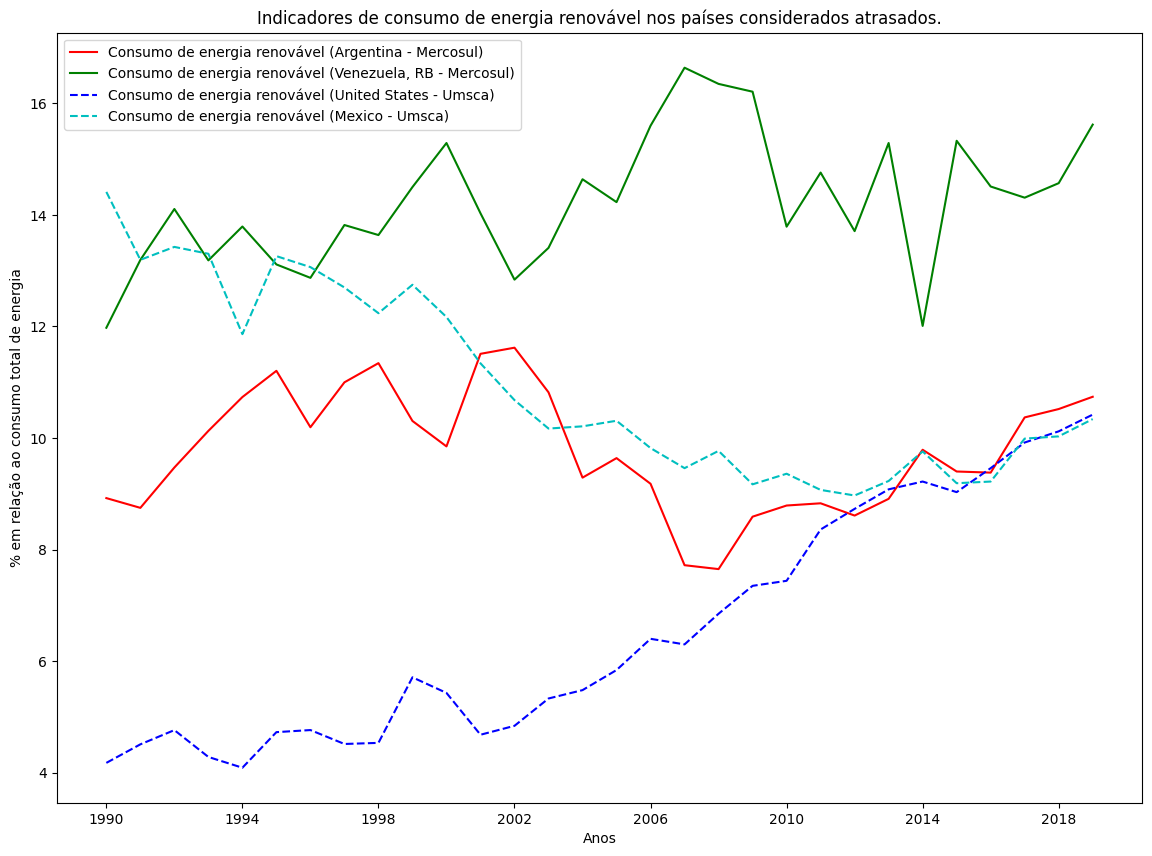

In [6]:
plt.figure(figsize=(14,10))
plt.title("Indicadores de consumo de energia renovável nos países considerados atrasados.")
id_cor = 0
for pais in paises_atrasados_mercosul:
    dados = dict_mercosul[pais]
    data = list(dados.keys())
    valor = list(dados.values())
    plt.plot(data, valor, color=lista_de_cores[id_cor], label=f'Consumo de energia renovável ({str(pais)} - Mercosul)')
    id_cor += 1
for pais in paises_atrasados_usmca:
    dados = dict_usmca[pais]
    data = list(dados.keys())
    valor = list(dados.values())
    plt.plot(data, valor, color=lista_de_cores[id_cor], linestyle = 'dashed',label=f'Consumo de energia renovável ({str(pais)} - Umsca)')
    id_cor += 1

plt.xticks(list(str(i) for i in range(1990,2020,4)))
plt.legend()
plt.ylabel('% em relação ao consumo total de energia')
plt.xlabel('Anos')
plt.show()

In [7]:
#bayes
#probabilidade de um pais ser avançado visto que é do mercosul
prob_avancado_mercosul = len(paises_avancados_mercosul)/len(df_paises_mercosul)
print(f'Probabilidade de um pais ser avançado visto que é do mercosul : {prob_avancado_mercosul}')
#probabilidade de um pais ser avançado visto que é da usmca
prob_avancado_usmca = len(paises_avancados_usmca)/len(df_usmca)
print(f'Probabilidade de um pais ser avançado visto que é da usmca : {prob_avancado_usmca}')

prob_avancado = 0.5
prob_bloco_mercosul = 5/8
prob_bloco_usmca = 3/8
#teorema de bayes

prob_mercosul_avancado = (prob_avancado_mercosul* prob_bloco_mercosul)/prob_avancado
prob_usmca_avancado = (prob_avancado_usmca*prob_bloco_usmca)/prob_avancado
print(f'Probabilidade de um pais pertencer ao mercosul dado que é avançado : {prob_mercosul_avancado}')
print(f'Probabilidade de um país pertencer a usmca dado que é avançado: {prob_usmca_avancado}')

Probabilidade de um pais ser avançado visto que é do mercosul : 0.6
Probabilidade de um pais ser avançado visto que é da usmca : 0.3333333333333333
Probabilidade de um pais pertencer ao mercosul dado que é avançado : 0.75
Probabilidade de um país pertencer a usmca dado que é avançado: 0.25


In [27]:
#CLASSIFICAÇÃO DOS PAÍSES COM BASE NO PREDITOR, CONSIDERANDO OS AVANÇADOS
#COMO PERTENCENTES AO MERCOSUL E OS ATRASADOS COMO PERTENCENTES AO USMCA
acertos = 0
total = 0
for pais in df_juntos['País']:
    if pais in paises_avancados_mercosul or pais in paises_avancados_usmca:
        print(f'{pais} seria classificado como membro do Mercosul seguindo o preditor')
        if pais in paises_do_mercosul:
            acertos += 1
    else:
        print(f'{pais} seria classificado como membro da USMCA seguindo o preditor')
        if pais in paises_do_usmca:
            acertos += 1
    total += 1

print(f'\nA probabilidade de acerto nas classificações fornecidas pelo preditor é de {(acertos/total) * 100:.2f}%')


Brazil seria classificado como membro do Mercosul seguindo o preditor
Argentina seria classificado como membro da USMCA seguindo o preditor
Uruguay seria classificado como membro do Mercosul seguindo o preditor
Paraguay seria classificado como membro do Mercosul seguindo o preditor
Venezuela, RB seria classificado como membro da USMCA seguindo o preditor
United States seria classificado como membro da USMCA seguindo o preditor
Mexico seria classificado como membro da USMCA seguindo o preditor
Canada seria classificado como membro do Mercosul seguindo o preditor

A probabilidade de acerto nas classificações fornecidas pelo preditor é de 62.50%


 PONTOS CORRIGIDOS APÓS O FEEDBACK DA ENTREGA DA APS 2:
- Professor, combinamos de rever o feedback na segunda-feira, portanto eu ainda não fiz as alterações, assim como deixarei essa parte em branco.
